In [1]:
import zipfile
with zipfile.ZipFile('stock_price_data.zip') as zip_obj:
    zip_obj.extractall('stock_price_data')

In [157]:
import pandas as pd

In [158]:
metadata= pd.read_csv('stock_price_data/symbols_valid_meta.csv')
metadata.tail()

,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
8044,Y,ZUO,"Zuora, Inc. Class A Common Stock",N,,N,100.0,N,NaN,ZUO,ZUO,N
8045,Y,ZVO,Zovio Inc. - Common Stock,Q,Q,N,100.0,N,N,NaN,ZVO,N
8046,Y,ZYME,Zymeworks Inc. Common Shares,N,,N,100.0,N,NaN,ZYME,ZYME,N
8047,Y,ZYNE,"Zynerba Pharmaceuticals, Inc. - Common Stock",Q,G,N,100.0,N,N,NaN,ZYNE,N
8048,Y,ZYXI,"Zynex, Inc. - Common Stock",Q,S,N,100.0,N,N,NaN,ZYXI,N


In [159]:
import os

In [160]:
# going through list of directories of stocks to get prices of each stock

data_path='stock_price_data/stocks'
tickers=os.listdir(data_path)
data={}

for ticker in tickers:
    df=pd.read_csv(os.path.join(data_path,ticker))
    df['Ticker'] = ticker.split('.')[0]  # Extract symbol from filename
    data[ticker] = df

In [161]:
len (data.keys())

5884

In [163]:
df['Ticker']

0       ZYXI
1       ZYXI
2       ZYXI
3       ZYXI
4       ZYXI
        ... 
4049    ZYXI
4050    ZYXI
4051    ZYXI
4052    ZYXI
4053    ZYXI
Name: Ticker, Length: 4054, dtype: object

In [164]:
for ticker, df in data.items():
     if df.isnull().any(axis=1).sum() > 1:
          print (ticker , df.isnull().any(axis=1).sum())
    #df.fillna(method='ffill', inplace=True)
    #df.fillna(method='bfill', inplace=True)

BAM.csv 2
BBX.csv 22
BPOPN.csv 2
BSM.csv 2
CAH.csv 2
CAT.csv 2
FARM.csv 3
FCBC.csv 2
FELE.csv 3
FTFT.csv 2
FTR.csv 3
HMG.csv 5
HOG.csv 2
IRET.csv 2
KLR.csv 3
MARPS.csv 18
MMX.csv 3
MS.csv 2
MSEX.csv 2
MTA.csv 21
NIU.csv 2
NLOK.csv 27
NOC.csv 3
NTR.csv 35
OR.csv 4
PCB.csv 8
PIPR.csv 11
RCP.csv 4
RHE.csv 3
RHI.csv 7
RMG.csv 4
RMI.csv 9
RNP.csv 9
RNST.csv 3
SBCF.csv 4
SWP.csv 2
TAK.csv 2
TFII.csv 12
TM.csv 5
VALU.csv 12
VXX.csv 4
WOR.csv 2
WTRG.csv 138
ZIONO.csv 24


In [145]:
# note if you want to process any of the above script , please use this method to first fill the missing values
# for df , ticker in df.items():
    #df.fillna(method='ffill', inplace=True)
    #df.fillna(method='bfill', inplace=True)


In [165]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Ticker'],
      dtype='object')

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4054 entries, 0 to 4053
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4054 non-null   object 
 1   Open       4054 non-null   float64
 2   High       4054 non-null   float64
 3   Low        4054 non-null   float64
 4   Close      4054 non-null   float64
 5   Adj Close  4054 non-null   float64
 6   Volume     4054 non-null   float64
 7   Ticker     4054 non-null   object 
dtypes: float64(6), object(2)
memory usage: 253.5+ KB


In [149]:
# since the ticker value is same across all rows , and does not provide any useful information , we 
#should drop that before moving forward


In [236]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
#for ticker , df  in data.items():
 #   df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]=ms.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])

In [150]:
# for each ticker we want to create a sequence of last 30 days 

import numpy as np

def create_sequences(data, sequence_length=30):
    X,y=[],[]
    for i in range(len(data)- sequence_length):
        X.append(data[i:i+sequence_length,:])
        y.append(data[i+sequence_length,3]) # 3 = close price 

    return np.array(X,dtype=np.float32),np.array(y,dtype=np.float32)

In [228]:
ticker_data = data['GOOGL.csv']

In [229]:
ticker_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3932 entries, 0 to 3931
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3932 non-null   object 
 1   Open       3932 non-null   float64
 2   High       3932 non-null   float64
 3   Low        3932 non-null   float64
 4   Close      3932 non-null   float64
 5   Adj Close  3932 non-null   float64
 6   Volume     3932 non-null   int64  
 7   Ticker     3932 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 245.9+ KB


In [230]:
ticker_data = ticker_data.drop(columns=['Ticker','Date'])

In [231]:
# sanity check
ticker_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3932 entries, 0 to 3931
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3932 non-null   float64
 1   High       3932 non-null   float64
 2   Low        3932 non-null   float64
 3   Close      3932 non-null   float64
 4   Adj Close  3932 non-null   float64
 5   Volume     3932 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 184.4 KB


In [232]:
ticker_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3932.000000,3932.000000,3932.000000,3932.000000,3932.000000,3.932000e+03
mean,509.120446,513.765443,504.117829,509.072183,509.072183,7.047423e+06
std,356.977348,359.970162,353.926473,357.153459,357.153459,7.959722e+06
min,49.644646,50.920921,48.028027,50.055054,50.055054,5.206000e+05
25%,239.717220,241.657913,236.712967,238.697449,238.697449,1.902550e+06
50%,327.630127,331.894394,324.441940,327.722733,327.722733,4.337100e+06
75%,757.720001,763.542526,752.017502,758.502487,758.502487,8.914150e+06
max,1527.199951,1530.739990,1520.979980,1524.869995,1524.869995,8.215110e+07


In [237]:
ticker_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]=ms.fit_transform(ticker_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])

In [238]:
ticker_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3932.000000,3932.000000,3932.000000,3932.000000,3932.000000,3932.000000
mean,0.310970,0.312771,0.309643,0.311237,0.311237,0.079956
std,0.241600,0.243253,0.240284,0.242168,0.242168,0.097509
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.128640,0.128892,0.128100,0.127909,0.127909,0.016929
50%,0.188139,0.189870,0.187660,0.188273,0.188273,0.046753
75%,0.479221,0.481560,0.477945,0.480364,0.480364,0.102824
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [239]:
# Convert DataFrame to NumPy array
ticker_data = ticker_data.values

In [240]:
sequence_length=30
X, y = create_sequences(ticker_data,30)
print(X.shape,y.shape)

(3902, 30, 6) (3902,)


In [241]:
import tensorflow as tf

In [242]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=89)

In [243]:
print (X_train.shape, y_train.shape)

(2731, 30, 6) (2731,)


In [244]:
## building and training GRU 

from keras.models import Sequential
from keras.layers import GRU, Dense ,Dropout

model=Sequential()
model.add(GRU(units=128,activation='tanh',return_sequences=True))
model.add(Dropout(0.3))
model.add(GRU(64, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(GRU(units=16))
model.add(Dense(32))
model.add(Dense(1))


In [245]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [246]:
model.fit(X_train,y_train,epochs=10, batch_size=32,validation_data=(X_test,y_test))

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0233 - val_loss: 8.1595e-04
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0016 - val_loss: 1.9533e-04
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0010 - val_loss: 7.9049e-04
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 8.0615e-04 - val_loss: 2.3392e-04
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 6.6828e-04 - val_loss: 2.5076e-04
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 5.6949e-04 - val_loss: 3.5234e-04
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 5.7115e-04 - val_loss: 3.3573e-04
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 5.7453e-04 - val_loss: 4.3368e-04
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 4.8306e-04 - val_loss: 2.2011e-04
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 4.4688e-04 - val_loss: 5.2029e-04


In [247]:
loss = model.evaluate(X_test, y_test)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6447e-04


In [248]:
# Make predictions
predictions = model.predict(X_test)

# You can compare predictions to actual values like this:
print("Predictions:", predictions[:5])  # First 5 predictions
print("True values:", y_test[:5])  # First 5 true value

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Predictions: [[0.61879784]
 [0.32233393]
 [0.30880326]
 [0.10799014]
 [0.1680415 ]]
True values: [0.6363069  0.35819745 0.30945915 0.11144406 0.17791547]


In [254]:
predictions = predictions.reshape(-1,1)

In [256]:
actual_predictions = ms.inverse_transform(np.concatenate([np.zeros((predictions.shape[0], 5)), predictions], axis=1))[:, -1]

In [258]:
actual_predictions.shape

(1171,)

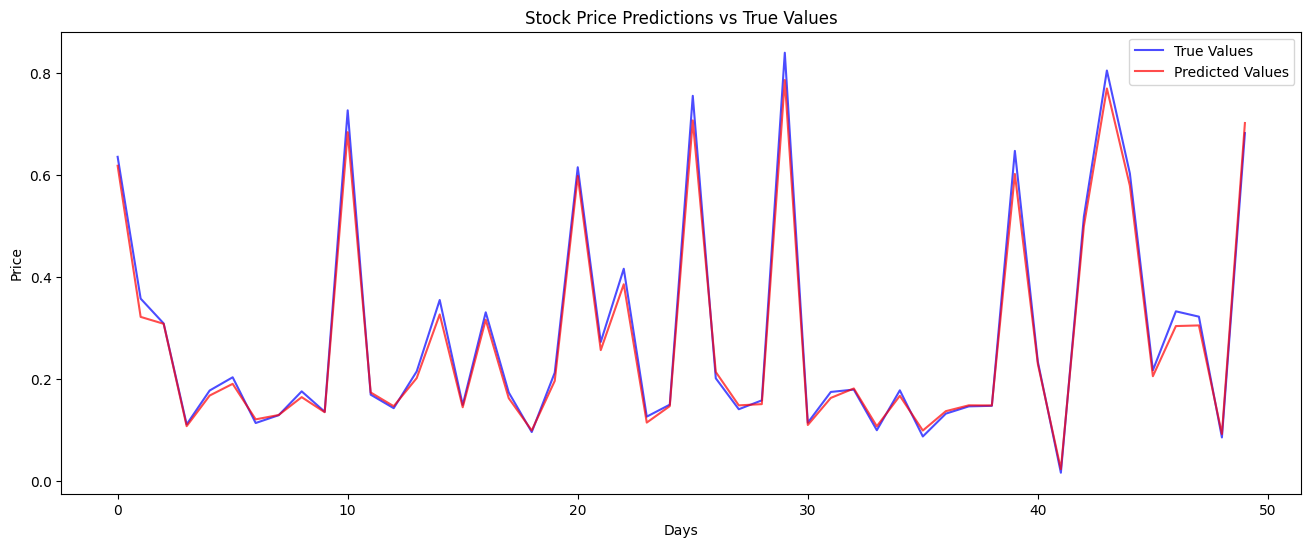

In [264]:
import matplotlib.pyplot as plt
y_pred = predictions[:50].flatten()
y_true = y_test[:50].flatten()

# Plotting
plt.figure(figsize=(16, 6))  # Adjust the size as needed
plt.plot(y_true, label='True Values', color='blue', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', color='red', alpha=0.7)

plt.title('Stock Price Predictions vs True Values')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend(loc='best')

plt.show()